In [121]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import scipy
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [122]:
# dir for mac

sst_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/OISST/northeast_sst.nc"
prec_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/TRMM/northeast_precip.nc"

In [123]:
sst_oisst = xr.open_dataarray(sst_file_dir)

sst_oisst = sst_oisst.loc[0: 8034,:, :]

precip = xr.open_dataarray(prec_file_dir)

date_time = pd.date_range(start='1998-01-01', periods=8034, freq='D')

sst_oisst['time'] = date_time

precip['time'] = date_time

In [141]:
sst_oisst

<xarray.DataArray 'sst' (time: 8034, lat: 122, lon: 122)>
[119578056 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -40.12 -39.88 -39.62 -39.38 ... -10.38 -10.12 -9.875
  * lon      (lon) float64 139.9 140.1 140.4 140.6 ... 169.4 169.6 169.9 170.1
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2019-12-30

In [127]:
precip_monthly_mean = precip.groupby('time.month').mean()

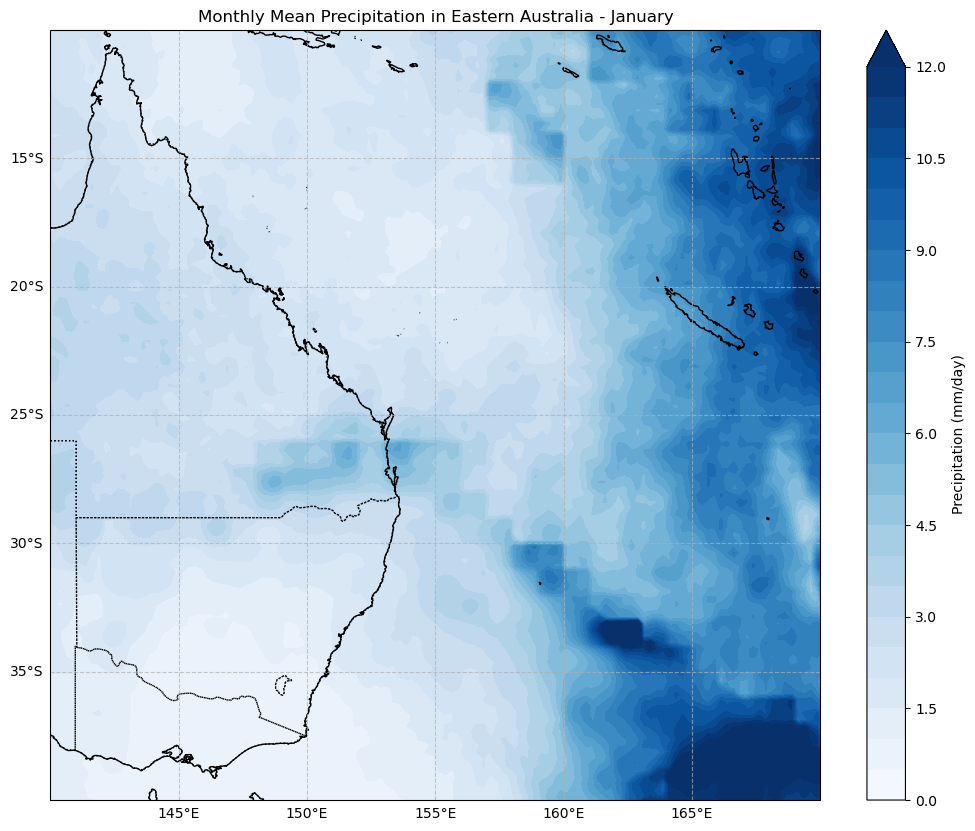

In [137]:
plt.figure(figsize=(12, 10))
    
# Use PlateCarree projection for Australia
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines, borders, and states
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')
    
# Add ocean and land features
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightblue', alpha=0.2)
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey', alpha=0.2)

# Set the extent to focus on eastern Australia
ax.set_extent([140, 170, -40, -10], crs=ccrs.PlateCarree())

# Set levels to control the range (adjust max value as needed)
levels = np.linspace(0, 12, 25)  # 0 to 10 mm/day with 21 levels

# Create the contour plot
contour = ax.contourf(precip_monthly_mean.lon, precip_monthly_mean.lat, precip_monthly_mean.isel(month=0), 
                        levels=levels, cmap='Blues', extend='max',
                        transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
gl.top_labels = False
gl.right_labels = False

# Add colorbar
cbar = plt.colorbar(contour, label='Precipitation (mm/day)', pad=0.05, fraction=0.05)

# Add titles and labels
plt.title('Monthly Mean Precipitation in Eastern Australia - January')

plt.show()
    

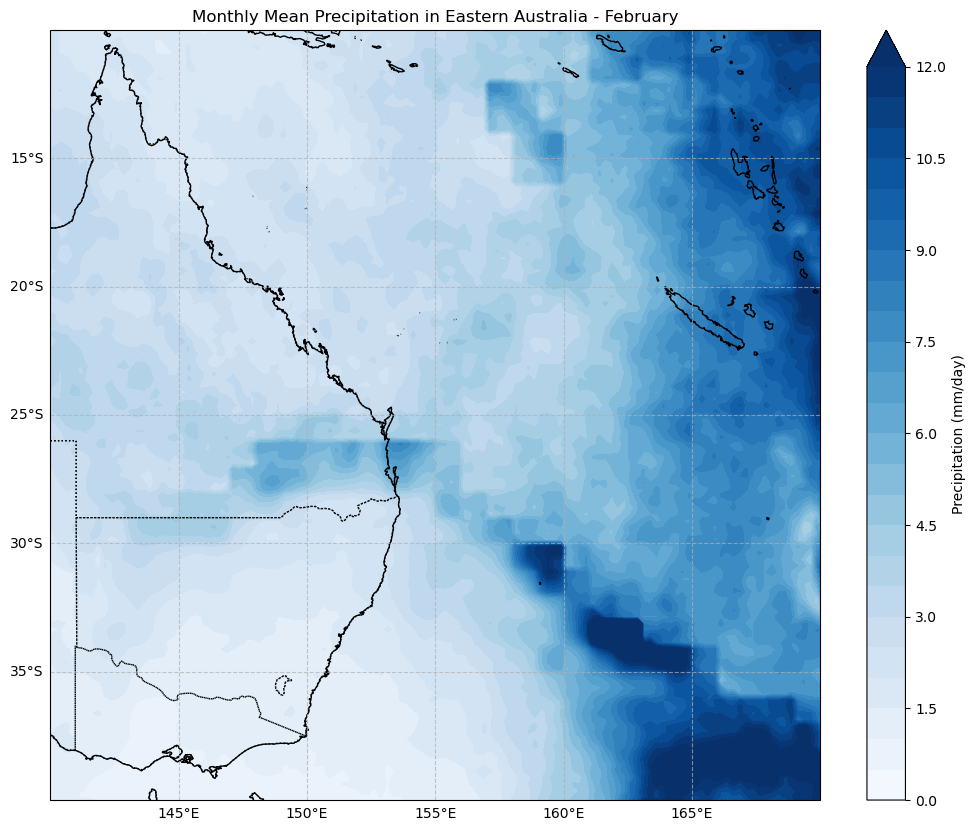

In [138]:
plt.figure(figsize=(12, 10))
    
# Use PlateCarree projection for Australia
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines, borders, and states
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')
    
# Add ocean and land features
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightblue', alpha=0.2)
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey', alpha=0.2)

# Set the extent to focus on eastern Australia
ax.set_extent([140, 170, -40, -10], crs=ccrs.PlateCarree())

# Set levels to control the range (adjust max value as needed)
levels = np.linspace(0, 12, 25)  # 0 to 10 mm/day with 21 levels

# Create the contour plot
contour = ax.contourf(precip_monthly_mean.lon, precip_monthly_mean.lat, precip_monthly_mean.isel(month=1), 
                        levels=levels, cmap='Blues', extend='max',
                        transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
gl.top_labels = False
gl.right_labels = False

# Add colorbar
cbar = plt.colorbar(contour, label='Precipitation (mm/day)', pad=0.05, fraction=0.05)

# Add titles and labels
plt.title('Monthly Mean Precipitation in Eastern Australia - February')

plt.show()
    

In [ ]:
plt.figure(figsize=(12, 10))
    
# Use PlateCarree projection for Australia
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines, borders, and states
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')
    
# Add ocean and land features
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightblue', alpha=0.2)
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey', alpha=0.2)

# Set the extent to focus on eastern Australia
ax.set_extent([140, 170, -40, -10], crs=ccrs.PlateCarree())

# Set levels to control the range (adjust max value as needed)
levels = np.linspace(0, 10, 21)  # 0 to 10 mm/day with 21 levels

# Create the contour plot
contour = ax.contourf(precip_monthly_mean.lon, precip_monthly_mean.lat, precip_monthly_mean.isel(month=0), 
                        levels=levels, cmap='Blues', extend='max',
                        transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
gl.top_labels = False
gl.right_labels = False

# Add colorbar
cbar = plt.colorbar(contour, label='Precipitation (mm/day)', pad=0.05, fraction=0.05)

# Add titles and labels
plt.title('Monthly Mean Precipitation in Eastern Australia - January')

plt.show()
    

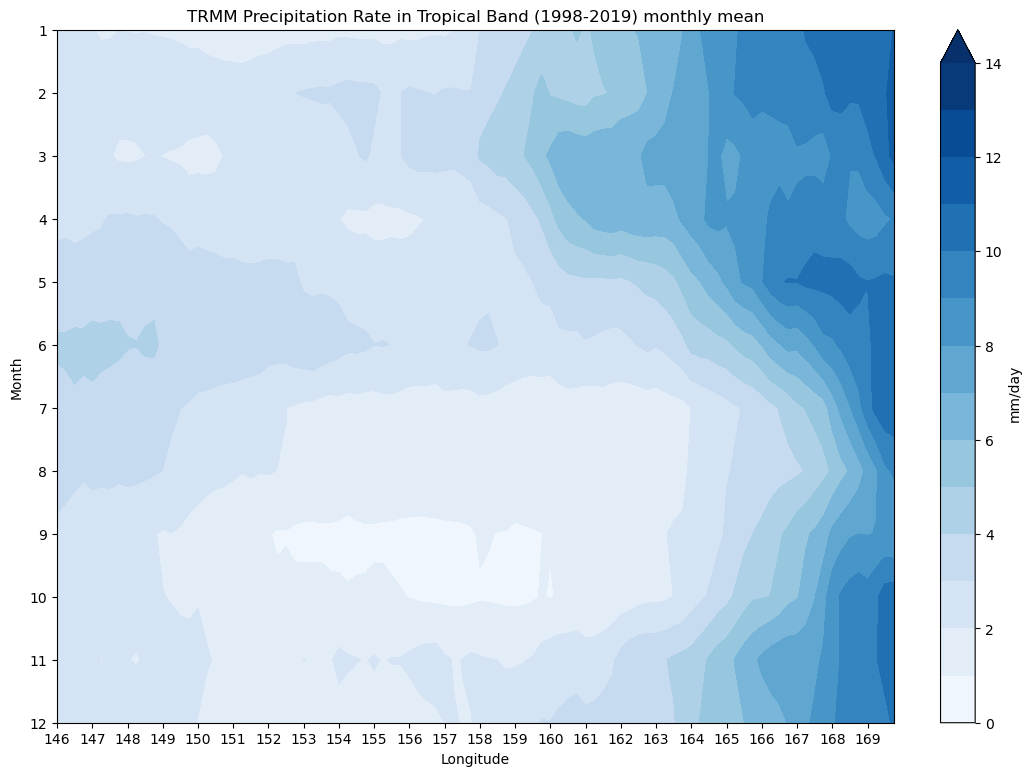

In [124]:
precip_tropical_band = precip.sel(lat=slice(-18,-15), lon=slice(146,170)).mean(dim='lat')

precip_tropical_band_monthly = precip_tropical_band.groupby('time.month').mean(dim='time')

figure, ax = plt.subplots(figsize=(12, 9))

# Set the colorbar range from 0 to 13 mm/day with 20 levels
levels = np.linspace(0, 14, 15)  
plt.contourf(precip_tropical_band_monthly, cmap='Blues', levels=levels, extend='max')
# 'extend='max'' will add triangles for values above 13 mm/day

plt.xticks(np.arange(0, 96, 4), np.arange(146, 170, 1))
plt.yticks(np.arange(0, 12, 1), np.arange(1, 13, 1))
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)
plt.title('TRMM Precipitation Rate in Tropical Band (1998-2019) monthly mean')
plt.xlabel('Longitude')
plt.ylabel('Month')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()

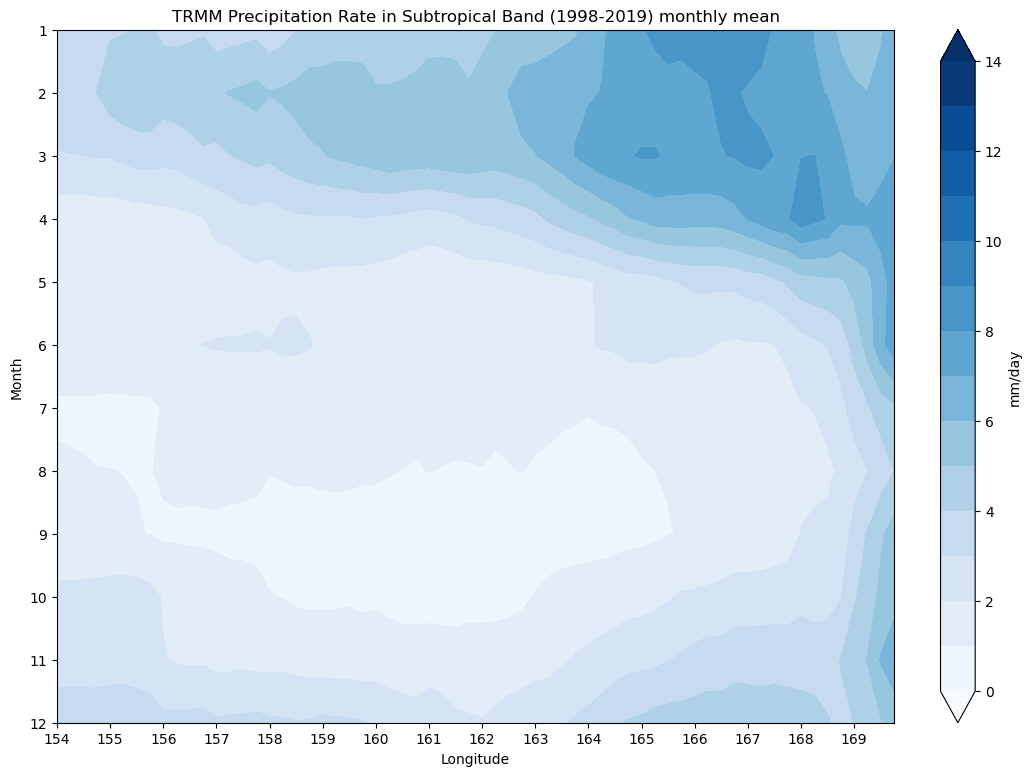

In [125]:
precip_subtropical_band = precip.sel(lat=slice(-30,-27), lon=slice(154,170)).mean(dim='lat')

precip_subtropical_band_monthly = precip_subtropical_band.groupby('time.month').mean(dim='time')

figure, ax = plt.subplots(figsize=(12, 9))
plt.contourf(precip_subtropical_band_monthly, cmap='Blues', levels=np.linspace(0, 14, 15) , extend='both')
plt.xticks(np.arange(0, 64, 4), np.arange(154, 170, 1))
plt.yticks(np.arange(0, 12, 1), np.arange(1, 13, 1))
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)
plt.title('TRMM Precipitation Rate in Subtropical Band (1998-2019) monthly mean')
plt.xlabel('Longitude')
plt.ylabel('Month')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()

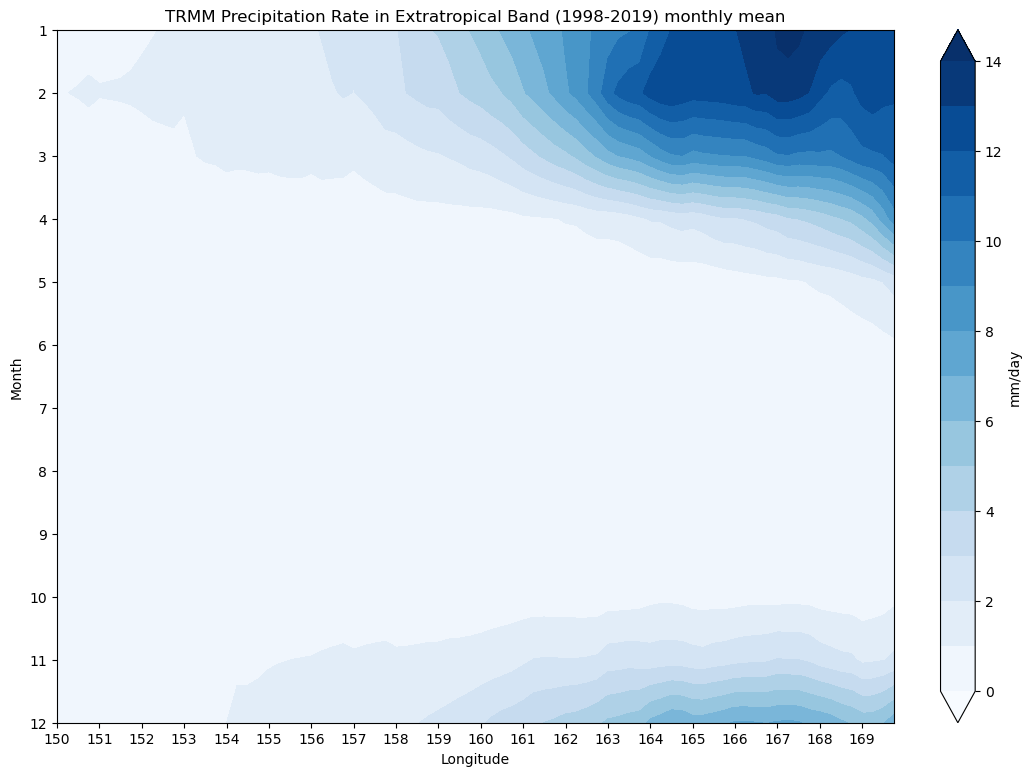

In [126]:
precip_extratropical_band = precip.sel(lat=slice(-40,-37), lon=slice(150,170)).mean(dim='lat')

precip_extratropical_band_monthly = precip_extratropical_band.groupby('time.month').mean(dim='time')

figure, ax = plt.subplots(figsize=(12, 9))
plt.contourf(precip_extratropical_band_monthly, cmap='Blues', levels=np.linspace(0, 14, 15) , extend='both')
plt.xticks(np.arange(0, 80, 4), np.arange(150, 170, 1))
plt.yticks(np.arange(0, 12, 1), np.arange(1, 13, 1))
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)
plt.title('TRMM Precipitation Rate in Extratropical Band (1998-2019) monthly mean')
plt.xlabel('Longitude')
plt.ylabel('Month')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()